In [50]:
#import the important libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
import datetime
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, Dense
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
df = pd.read_csv('archive/hmnist_28_28_RGB.csv')
df = df.sample(frac = 1) # randomize the data
data = df.iloc[:,:-1] # extract the pixel data
labels = df.iloc[:,-1:] # extract the corresponding labels
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
2733,180,151,163,181,155,168,183,160,171,185,...,185,170,169,183,165,163,182,165,163,1
509,124,112,114,130,119,124,135,123,132,142,...,101,80,92,96,76,87,87,69,76,2
5259,233,148,147,235,148,151,233,147,153,234,...,217,145,138,213,139,132,213,140,133,4
1379,201,168,203,199,166,202,199,168,205,198,...,204,169,200,204,170,203,203,170,204,6
1578,17,16,16,50,42,49,119,111,126,148,...,129,115,113,88,75,75,32,27,29,6


In [52]:
labels.head(30)

,label
2733,1
509,2
5259,4
1379,6
1578,6
9683,4
427,2
6734,4
7765,4
885,2


C:\Users\Kismet Suan\AppData\Local\Temp\ipykernel_28844\2614493494.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(type_of_cancer)


[Text(0, 0, 'akiec'),
 Text(1, 0, 'df'),
 Text(2, 0, 'bkl'),
 Text(3, 0, 'mel'),
 Text(4, 0, 'nv'),
 Text(5, 0, 'vasc'),
 Text(6, 0, 'bcc')]

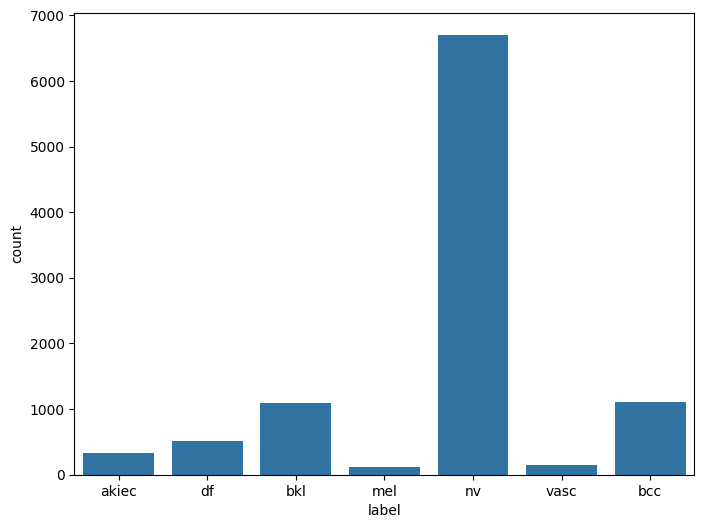

In [54]:
type_of_cancer = ['akiec','df','bkl','mel','nv','vasc','bcc']
counts = list(labels.value_counts())
plt.figure(figsize = (8,6))
ax = sns.countplot(x='label', data=df)
ax.set_xticklabels(type_of_cancer)

In [55]:
df = df.sort_values('label') # Sorting the data according to the labels
df = df.reset_index()

In [56]:
df

,index,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,9876,89,53,57,143,101,95,164,115,105,...,134,89,90,65,38,47,14,9,15,0
1,9809,198,136,127,198,131,119,201,136,120,...,196,128,100,194,134,110,192,134,112,0
2,9708,243,193,229,229,139,154,187,64,56,...,245,206,215,236,187,196,237,185,194,0
3,9889,135,109,105,144,118,115,163,139,138,...,178,156,163,171,146,153,167,144,151,0
4,9768,178,124,131,187,140,154,189,144,161,...,184,135,157,181,129,151,183,135,161,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,2043,243,221,226,243,223,227,244,222,226,...,241,217,230,241,218,232,241,217,233,6
10011,1449,213,159,171,209,138,159,210,142,153,...,229,172,183,220,163,163,214,156,144,6
10012,1675,139,124,135,143,127,139,147,127,136,...,152,140,154,147,134,148,143,132,145,6
10013,2216,158,132,134,164,138,140,172,148,153,...,144,113,120,138,104,110,138,107,110,6


In [57]:
index0 = df[df['label'] == 0].index.values
index1 = df[df['label'] == 1].index.values
index2 = df[df['label'] == 2].index.values
index3 = df[df['label'] == 3].index.values
index5 = df[df['label'] == 5].index.values
index6 = df[df['label'] == 6].index.values

In [58]:
df0 = df.iloc[int(min(index0)):int(max(index0)+1)]
df1 = df.iloc[int(min(index1)):int(max(index1)+1)]
df2 = df.iloc[int(min(index2)):int(max(index2)+1)]
df3 = df.iloc[int(min(index3)):int(max(index3)+1)]
df5 = df.iloc[int(min(index5)):int(max(index5)+1)]
df6 = df.iloc[int(min(index6)):int(max(index6)+1)]

In [63]:
# Repeating the rows of df0 17 times and concatenating
df_index0 = pd.concat([df0] * 18, ignore_index=True)  # including the original dataframe

# Repeating the rows of df1 15 times and concatenating
df_index1 = pd.concat([df1] * 16, ignore_index=True)  # including the original dataframe

# Repeating the rows of df2 5 times and concatenating
df_index2 = pd.concat([df2] * 6, ignore_index=True)   # including the original dataframe

# Repeating the rows of df3 52 times and concatenating
df_index3 = pd.concat([df3] * 53, ignore_index=True)  # including the original dataframe

# Repeating the rows of df5 45 times and concatenating
df_index5 = pd.concat([df5] * 46, ignore_index=True)  # including the original dataframe

# Repeating the rows of df6 5 times and concatenating
df_index6 = pd.concat([df6] * 6, ignore_index=True) 

# Combine all the dataframes into a list
frames = [df, df_index0, df_index1, df_index2, df_index3, df_index5, df_index6]

In [64]:
# Concatenating all the feature dataframes to form the final dataframe
final_df = pd.concat(frames)
final_df.drop('index', inplace = True, axis = 1)
final_df = final_df.sample(frac = 1)
data = final_df.iloc[:,:-1]
labels = final_df.iloc[:,-1:]

C:\Users\Kismet Suan\AppData\Local\Temp\ipykernel_28844\2614493494.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(type_of_cancer)


[Text(0, 0, 'akiec'),
 Text(1, 0, 'df'),
 Text(2, 0, 'bkl'),
 Text(3, 0, 'mel'),
 Text(4, 0, 'nv'),
 Text(5, 0, 'vasc'),
 Text(6, 0, 'bcc')]

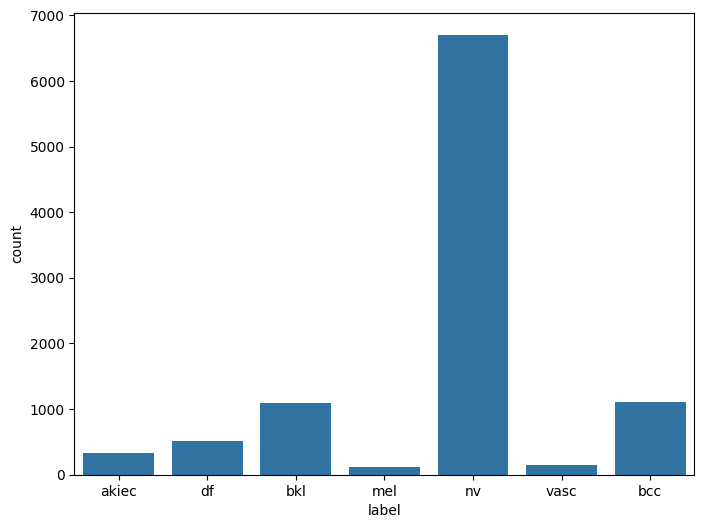

In [65]:
type_of_cancer = ['akiec','df','bkl','mel','nv','vasc','bcc']
counts = list(labels.value_counts())
plt.figure(figsize = (8,6))
ax = sns.countplot(x='label', data=df)
ax.set_xticklabels(type_of_cancer)

In [66]:
#data preprocessing

X = np.array(data)
Y = np.array(labels)

In [67]:
X = X.reshape(-1,28,28,3)

print( X.shape)
print( Y.shape)


(50024, 28, 28, 3)
(50024, 1)


In [68]:
X = (X-np.mean(X))/np.std(X)

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print( X_train.shape)
print( X_test.shape)
print( Y_train.shape)
print( Y_test.shape)

(40019, 28, 28, 3)
(10005, 28, 28, 3)
(40019, 1)
(10005, 1)


In [70]:
# Data Augmentation with ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 10,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  fill_mode = 'nearest')
train_datagen.fit(X_train)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen.fit(X_test)

train_data = train_datagen.flow(X_train, Y_train, batch_size = 64)
test_data = test_datagen.flow(X_test, Y_test, batch_size = 64)

In [71]:
model = Sequential([
    
    Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'),
    Conv2D(32, kernel_size = (3,3), activation = 'relu'),
    MaxPool2D(pool_size = (2,2)),

    Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    MaxPool2D(pool_size = (2,2), padding = 'same'),

    Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), padding = 'same'),

    Flatten(),
    
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')]
)

In [72]:
model = Sequential([
    
    Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'),
    Conv2D(32, kernel_size = (3,3), activation = 'relu'),
    MaxPool2D(pool_size = (2,2)),

    Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    MaxPool2D(pool_size = (2,2), padding = 'same'),

    Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), padding = 'same'),

    Flatten(),
    
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')]
)

In [73]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00075,
                                    beta_1 = 0.9,
                                    beta_2 = 0.999,
                                    epsilon = 1e-8)

In [74]:
model.compile(optimizer = optimizer,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [75]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 conv2d_31 (Conv2D)          (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 conv2d_33 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                

In [76]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ModuleNotFoundError: No module named 'keras.utils.vis_utils'

In [77]:
epochs = 20

history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 64,
                    epochs = epochs,
                    callbacks=[learning_rate_reduction]) 

Epoch 1/20
501/501 [==============================] - 33s 54ms/step - loss: 1.3611 - accuracy: 0.4526 - val_loss: 1.1428 - val_accuracy: 0.5558 - lr: 7.5000e-04
Epoch 2/20
501/501 [==============================] - 26s 51ms/step - loss: 0.8710 - accuracy: 0.6650 - val_loss: 0.6141 - val_accuracy: 0.7699 - lr: 7.5000e-04
Epoch 3/20
501/501 [==============================] - 26s 51ms/step - loss: 0.5050 - accuracy: 0.8102 - val_loss: 0.3821 - val_accuracy: 0.8627 - lr: 7.5000e-04
Epoch 4/20
501/501 [==============================] - 25s 50ms/step - loss: 0.3382 - accuracy: 0.8723 - val_loss: 0.2795 - val_accuracy: 0.8961 - lr: 7.5000e-04
Epoch 5/20
501/501 [==============================] - 26s 51ms/step - loss: 0.2432 - accuracy: 0.9089 - val_loss: 0.2264 - val_accuracy: 0.9209 - lr: 7.5000e-04
Epoch 6/20
501/501 [==============================] - 26s 51ms/step - loss: 0.1857 - accuracy: 0.9305 - val_loss: 0.2013 - val_accuracy: 0.9197 - lr: 7.5000e-04
Epoch 7/20
501/501 [==============

In [78]:
model_acc_test = model.evaluate(X_test, Y_test, verbose=0)[1]
print("the test model accuracy =",model_acc_test * 100)

the test model accuracy = 95.32234072685242


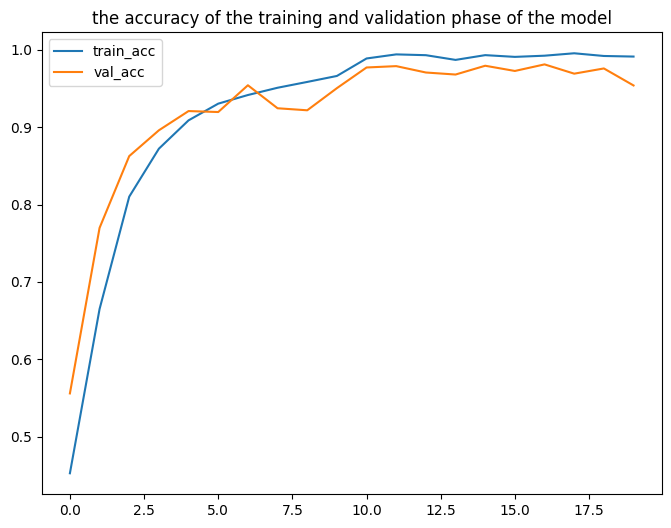

In [79]:
ACC = history.history['accuracy']
VAL_ACC = history.history['val_accuracy']

plt.figure(figsize=(8,6))
plt.title("the accuracy of the training and validation phase of the model")
plt.plot(ACC, label = 'train_acc')
plt.plot(VAL_ACC, label = 'val_acc')
plt.legend()

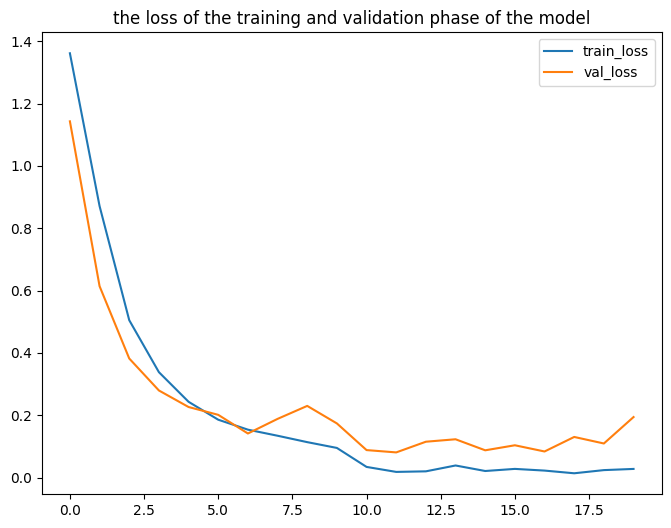

In [80]:
LOSS = history.history['loss']
VAL_LOSS = history.history['val_loss']

plt.figure(figsize=(8,6))
plt.title("the loss of the training and validation phase of the model")
plt.plot(LOSS, label = 'train_loss')
plt.plot(VAL_LOSS, label = 'val_loss')
plt.legend()

313/313 [==============================] - 5s 14ms/step


<Axes: title={'center': 'the confusion matrix of the model in the train'}>

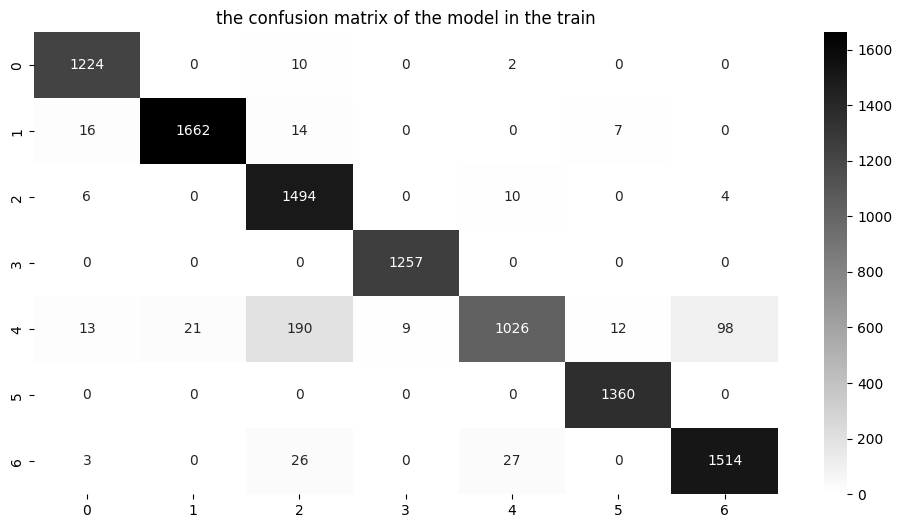

In [81]:
Y_true = np.array(Y_test)

Y_pred = model.predict(X_test)
Y_pred = np.array(list(map(lambda x: np.argmax(x), Y_pred)))

cm1 = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 6))
plt.title('the confusion matrix of the model in the train')
sns.heatmap(cm1, annot = True, fmt = 'g' ,vmin = 0, cmap = 'binary')

In [48]:
unique_classes = np.unique(Y_test)
print("Unique classes in Y_test:", unique_classes)

Unique classes in Y_test: [0 1 2 3]


In [82]:
label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

classification_report_model = classification_report(Y_true, Y_pred, target_names=label_mapping.values())
print(classification_report_model)

              precision    recall  f1-score   support

          nv       0.97      0.99      0.98      1236
         mel       0.99      0.98      0.98      1699
         bkl       0.86      0.99      0.92      1514
         bcc       0.99      1.00      1.00      1257
       akiec       0.96      0.75      0.84      1369
        vasc       0.99      1.00      0.99      1360
          df       0.94      0.96      0.95      1570

    accuracy                           0.95     10005
   macro avg       0.96      0.95      0.95     10005
weighted avg       0.96      0.95      0.95     10005



In [83]:
model.save('my_model.h5')

C:\Users\Kismet Suan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
